In [85]:
#import libraries
import numpy as np #linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Load Data

In [2]:
DeltaSquare = pd.read_csv('who_data.csv')

In [3]:
#check numbe of columns and rows
DeltaSquare .shape

(32561, 15)

In [4]:
#check for duplication
DeltaSquare.duplicated().sum()

24

In [5]:
#Drop the duplicated files
DeltaSquare = DeltaSquare.drop_duplicates()


In [6]:
#perform sanity checks
#check for duplication
DeltaSquare.duplicated().sum()

0

In [7]:
#Observes the target variable
DeltaSquare['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
target_mapping = {" <=50K": 0, " >50K": 1}
DeltaSquare['salary'] = DeltaSquare['salary'].map(target_mapping)


In [9]:
#saanity check on the salary column
DeltaSquare['salary'].unique()

array([0, 1], dtype=int64)

In [10]:
#Observe the columns
DeltaSquare.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [11]:
#check the dataset
DeltaSquare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  int64 
dtypes:

In [12]:
DeltaSquare['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

About 1836 people were shown as ? as workclass. I will have to assign this group as unknown

In [13]:
DeltaSquare.loc[DeltaSquare['workclass'] == ' ?', 'workclass'] = 'Unknown'

In [14]:
#performs sanity check
DeltaSquare['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
DeltaSquare.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [16]:
DeltaSquare.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [17]:
DeltaSquare.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [18]:
#check the salary column
DeltaSquare['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int64

In [19]:
DeltaSquare['salary'].isna().sum()

0

### Visualization

#### Perform Univariate visualization on the Numerical variables

In [20]:
#import mu Univariate function to Visualize the variables
from utils_univar_numerical import histogram_boxplot

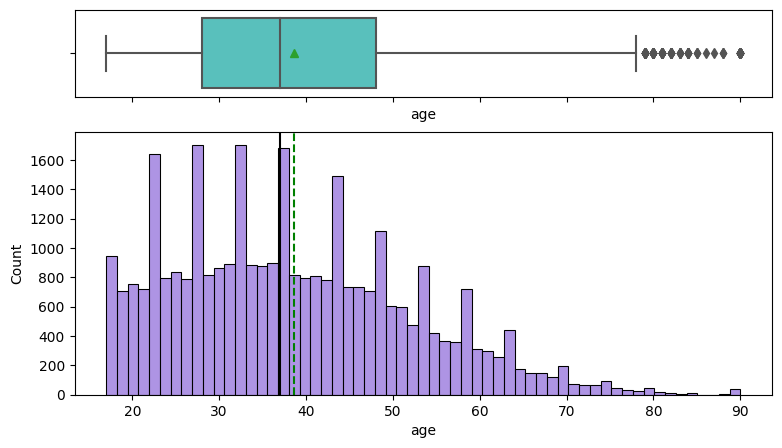

In [21]:
#Visualizing the age column
histogram_boxplot(data =DeltaSquare, feature = 'age')

The age column recorded an outlier. The distribution is also skewed towards the right

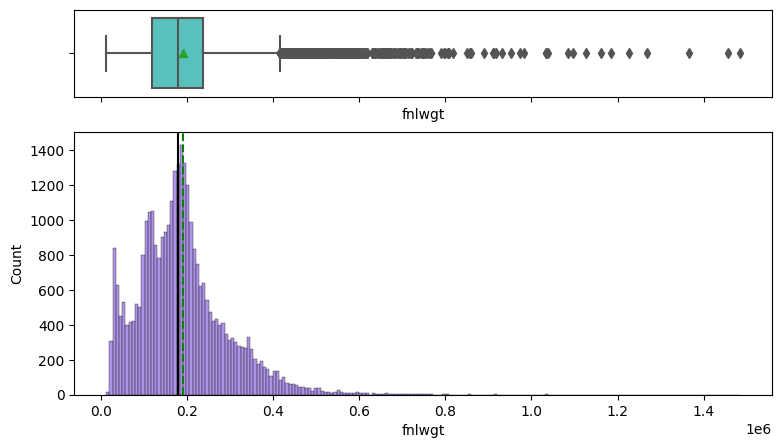

In [22]:
#Visiualize the assigned weight
histogram_boxplot(data =DeltaSquare, feature = 'fnlwgt')

The assigned weight also recorded slight skeweness towards the right interms of distribution with outliers recorded

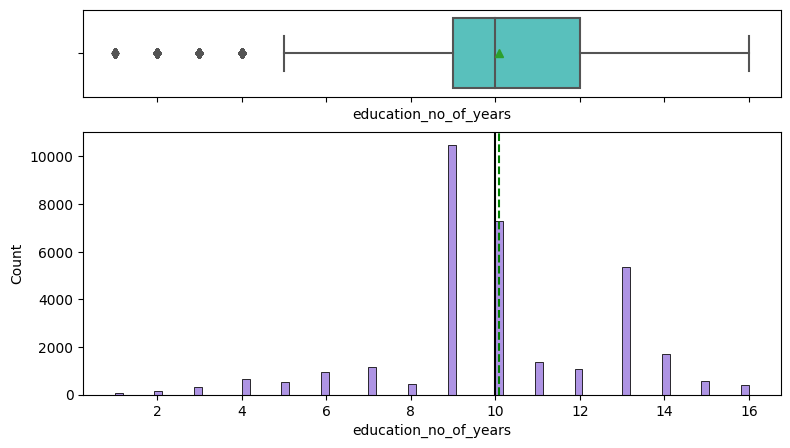

In [23]:
#Visiualize the education_no_of_years 
histogram_boxplot(data =DeltaSquare, feature = 'education_no_of_years')

The distribution is skewed to the left. The outliers are also found at the left whisker. However, the mean and the median are clos

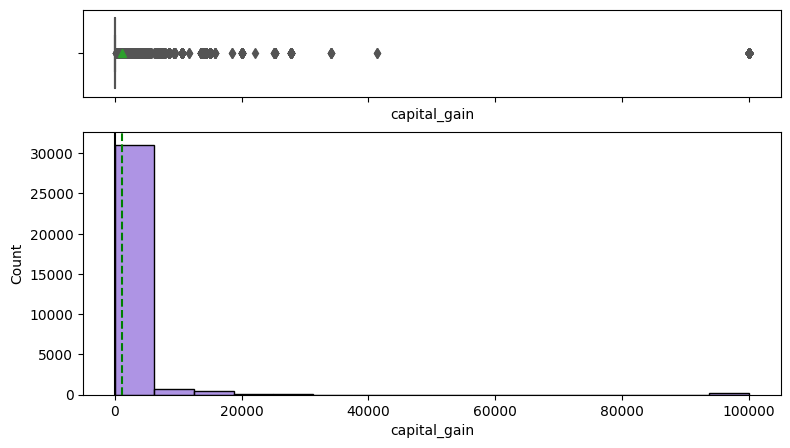

In [24]:
#Visiualize the capital_gain 
histogram_boxplot(data =DeltaSquare, feature = 'capital_gain')

The distribution seems to be well distributed. However, Outliers were noticed around 2000,3000 and 10,000

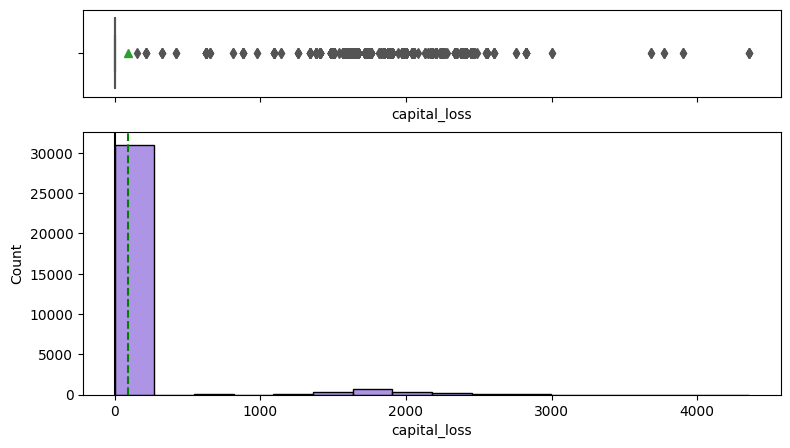

In [25]:
#Visiualize the capital_loss  
histogram_boxplot(data =DeltaSquare, feature = 'capital_loss')

Outliers were noticed in the dataset for this columns. The distribution also did not show evenly or normal distribution

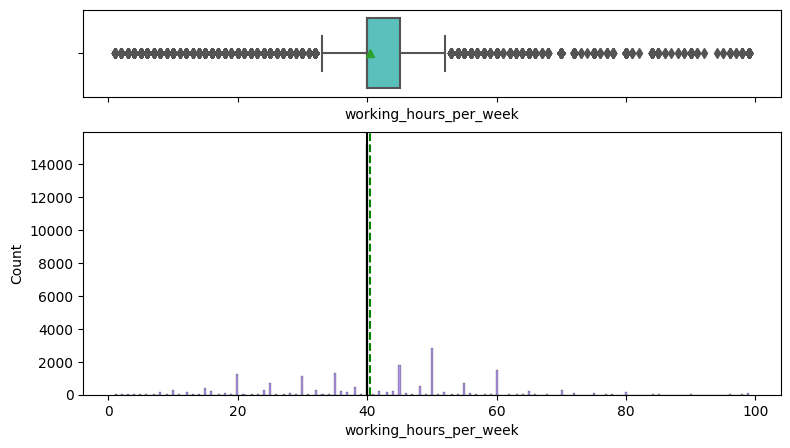

In [26]:
#Visiualize the working_hours_per_week  
histogram_boxplot(data =DeltaSquare, feature = 'working_hours_per_week')

The working hours seems to be evenly distributed.

#### Perform Univariate visualization on the Categorical variables

In [27]:
from utils_univar_cat import labeled_barplot

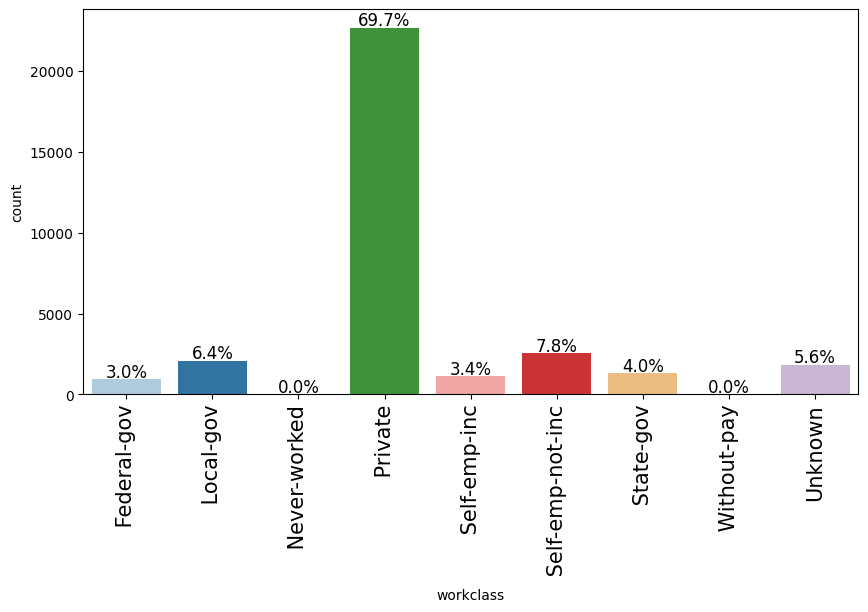

In [28]:
#Visiualize the Workclass
labeled_barplot(data = DeltaSquare, feature = 'workclass', perc = True )

This showed that 69.7% of people in the data obtained by WHO which the Deltasquare gave us works in the private sector. The federal, Local government and state contributes 3.0% , 6.4% and 4.0% respectively. There seems to be low number people that are self employed as the percentage for included and not included are 3.4% and 7.8% respectively which is low. A total of 5.6% are in a working class which are unknown to us.

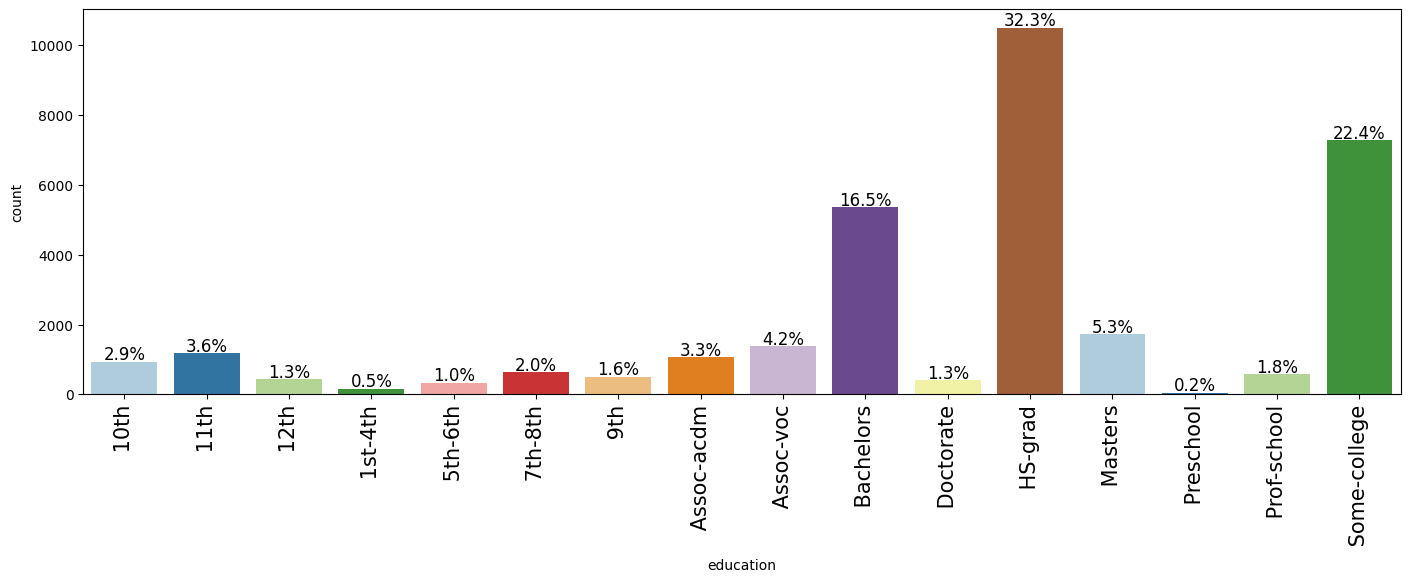

In [29]:
#Visiualize the education 
labeled_barplot(data = DeltaSquare, feature = 'education', perc = True )

We have more High school graduate with High school graduate accounting for 32.3% of the population when it comes to education. This is followed by Some-college with 22.4% and Bachelors with 16.5%. The visualization showed that we don't have enough University graduates in the data set

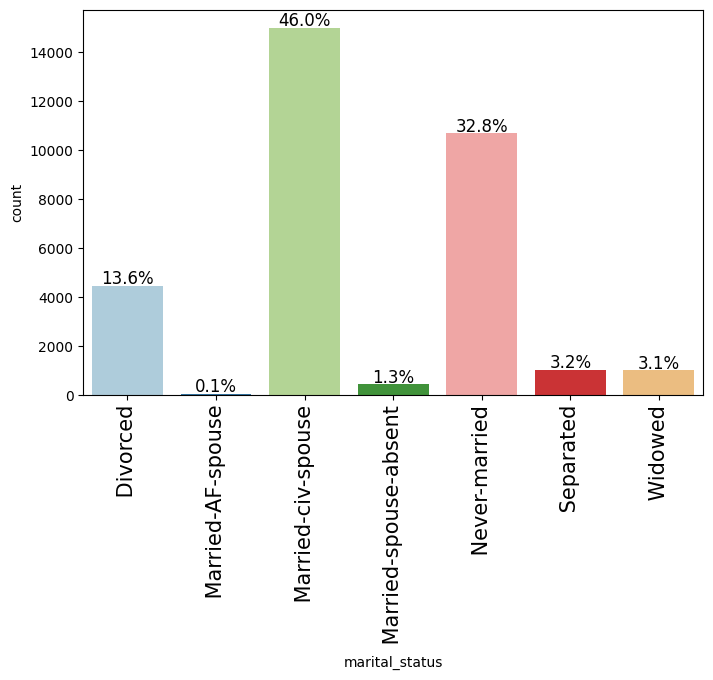

In [30]:
#Visiualize the marital_status  
labeled_barplot(data = DeltaSquare, feature = 'marital_status', perc = True)

We have married Civilian forces that made up 46.0% of the population in the dataset. This is followed by Never married with 32.8%. Married armed forces are small in numbers with percentage of 0.1%. Those identified as seperated accounts for 3.2% while the widows and divorced accounted for 3.1% and 13.6% respectively.

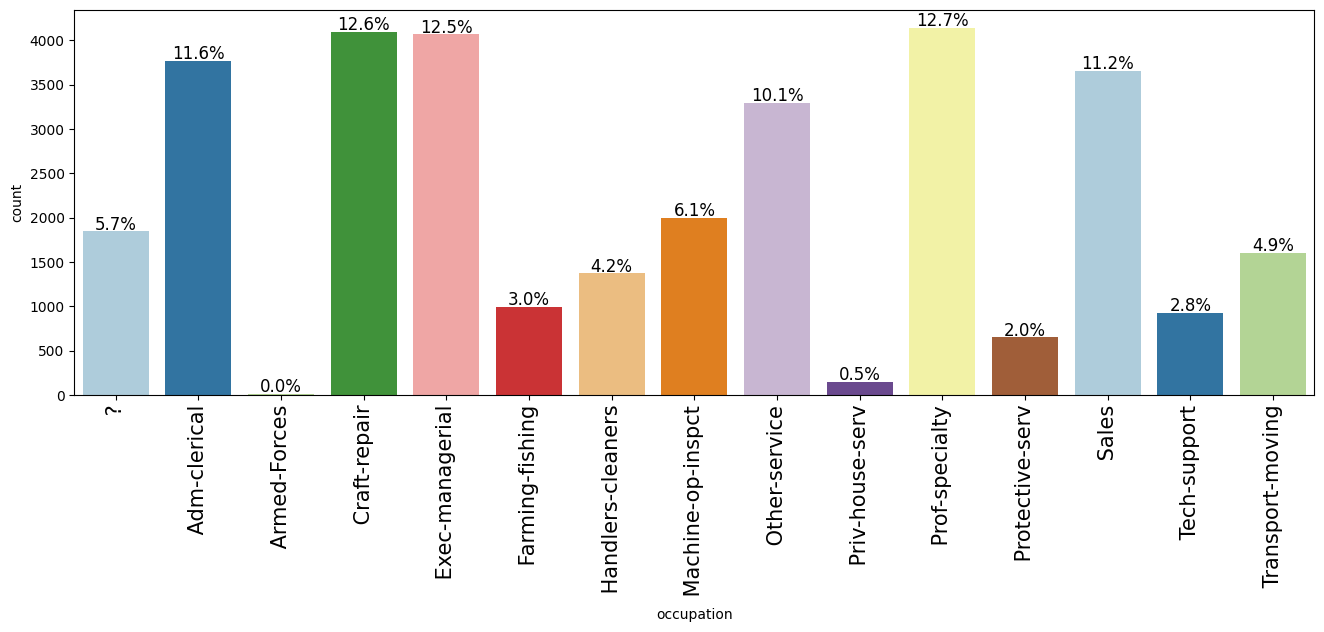

In [31]:
#Visiualize the occupation 
labeled_barplot(data = DeltaSquare, feature = 'occupation', perc = True)

The occupation seems to be evenly distributed with Craft repairers, Exec-managements, Prof-specialities, Adm-clerical and Sales topping the available occupation in the community.People seems not to be interested in the Arm forces as an occupation as the data shwoed 0.0% occupation rate for the Armed forces

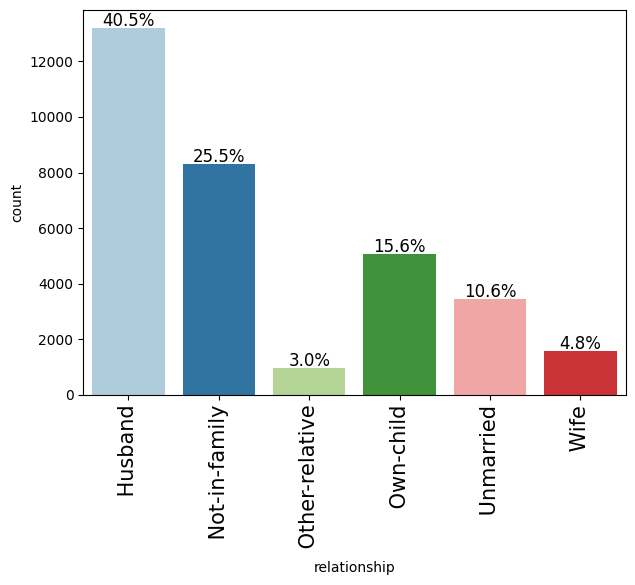

In [32]:
#Visiualize the relationship 
labeled_barplot(data = DeltaSquare, feature = 'relationship', perc = True)

For relationship, Husband accounts for 40.5%. Those that areNot -in family conributed 25.5%, Own-child is 15.6% while Unmarried and Wife are 10.6% and 4.8% respectively. They relatives accounted for 3.0%

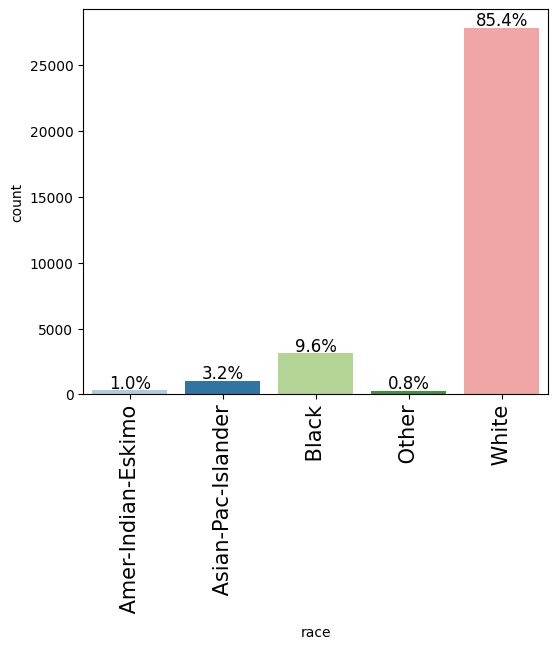

In [33]:
#Visiualize the race 
labeled_barplot(data = DeltaSquare, feature = 'race', perc = True)

The majority of the population are white with 85.4% of the entire population. This is distantly follwed by Blacks with 9.6% of the population. Other race combined contributed just 5% of the entire population. 

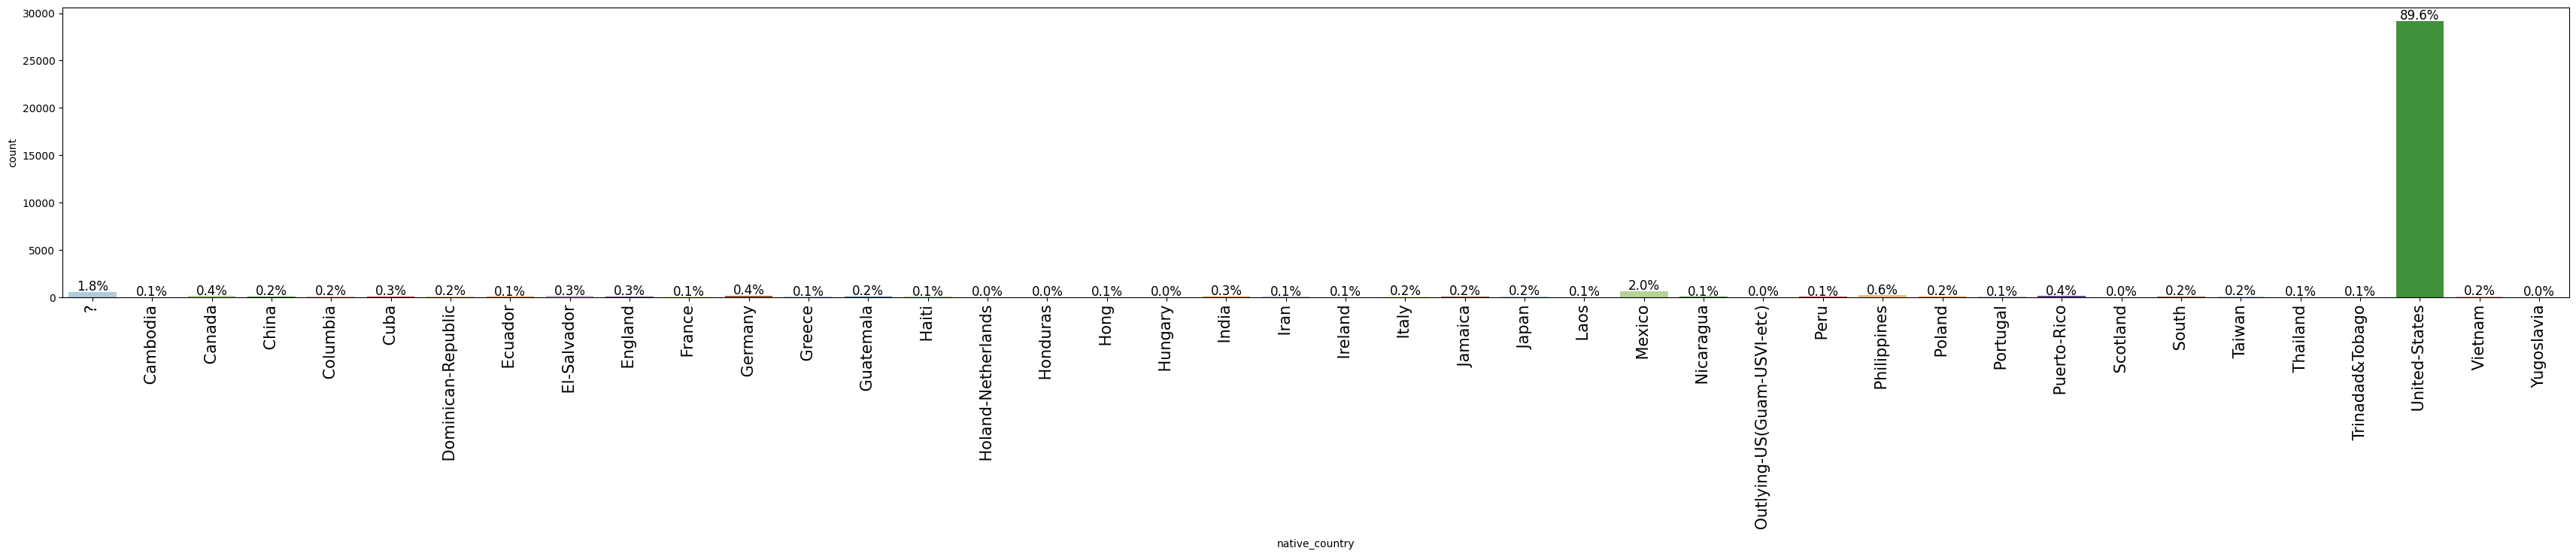

In [34]:
#Visiualize the native_country 
labeled_barplot(data = DeltaSquare, feature = 'native_country', perc = True)

89.6% of the entire population has the United States as their native country. We have 0.4% of Puerto_Ricans and 0.2% of Vietnames and Polish.0.6% of the population has Philippines as their natie country.

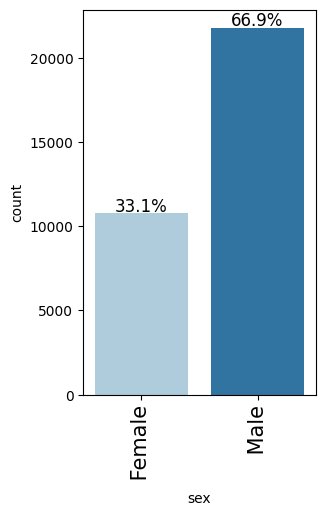

In [35]:
#Visiualize the sex 
labeled_barplot(data = DeltaSquare, feature = 'sex', perc = True)

66.9% of the population are male while 33.1% are femaile

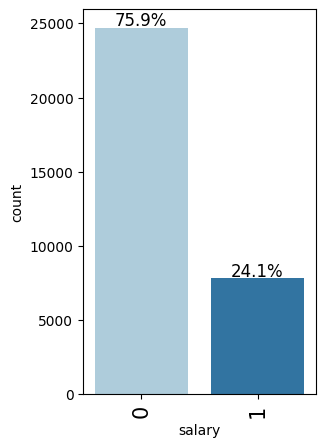

In [36]:
#Visiualize the salary 
labeled_barplot(data = DeltaSquare, feature = 'salary', perc = True)

75.9% of the population earns salary that are either 50k or lower while only 24.1% enars above 50k. The Data also seems to be imbalanced

In [37]:
DeltaSquare['salary'].value_counts(normalize = True)

0    0.759074
1    0.240926
Name: salary, dtype: float64

### Bivariate Visiualization and  Analysis

In [38]:
# Create function for scatterplot visualize numerical variables
def customer_plot(x,y, title,data =DeltaSquare):
    plt.figure(figsize = (6,4))
    sns.scatterplot(x = x, y = y, data = DeltaSquare)
    plt.title(title)
    plt.show()

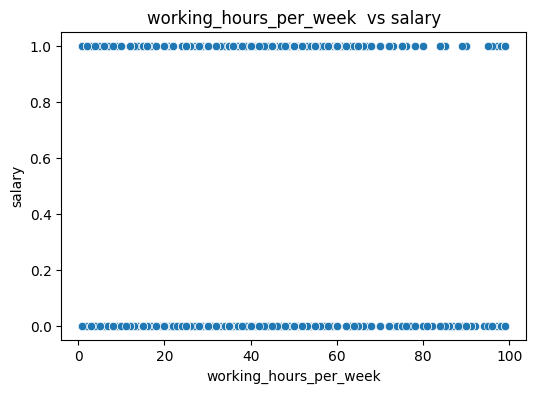

In [39]:
# Visualization of working hour per week vs salary
customer_plot(x = 'working_hours_per_week', y = 'salary',
             title = 'working_hours_per_week  vs salary')

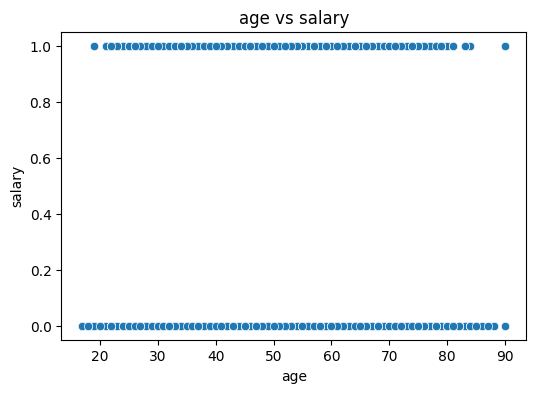

In [40]:
# Visualization of age vs salary
customer_plot(x = 'age', y = 'salary',
             title = 'age vs salary')

This showed no relationship between age and salary

#### Coreleation of the numerical variable

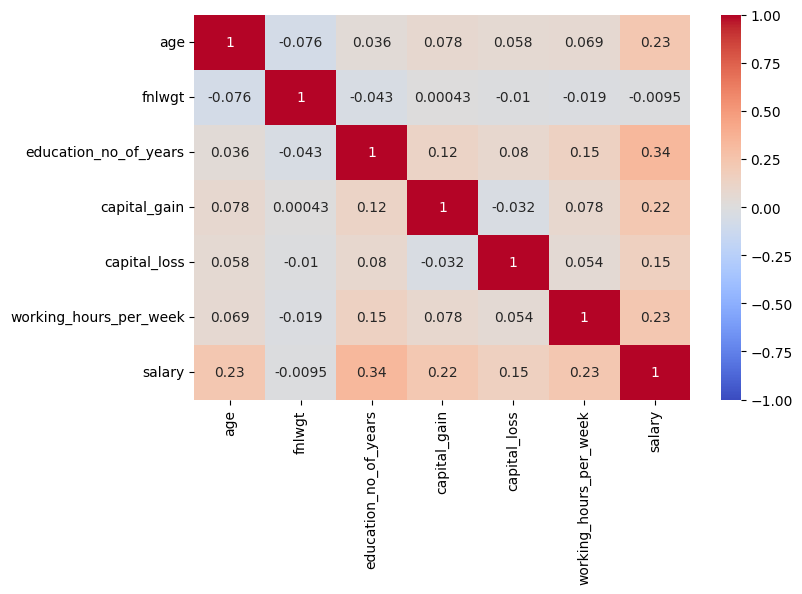

In [41]:
#Coreleation of the numerical variables

num_data = DeltaSquare.select_dtypes(include = 'number')

# calculate correlation
mat_cor = num_data.corr()
plt.figure(figsize = (8,5))
sns.heatmap(mat_cor, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

Just like the scatter plot showed, there are little contributions between the features and the target variable. There is low correlation between them

#### Outlier Detection and Handling

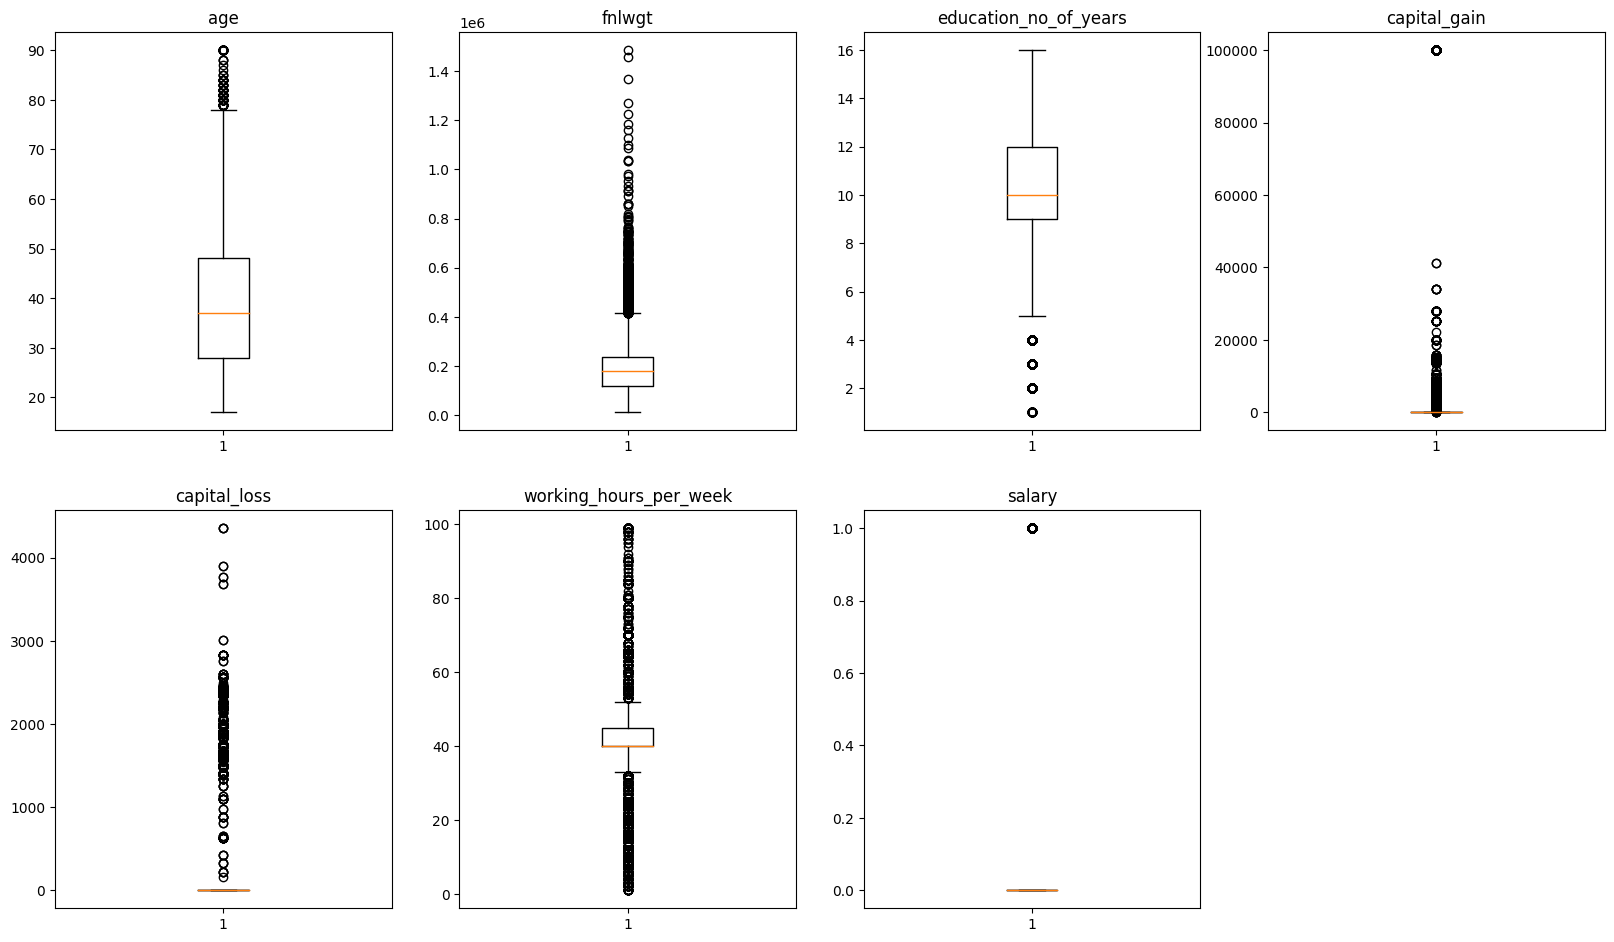

In [42]:
#Using boxplot for the detection
plt.figure(figsize = (20,30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(DeltaSquare[variable])
    plt.title(variable)

#### Treat Outliers

In [43]:
#Drop the traget variable Price
num_data.drop('salary', axis = 1, inplace = True)

In [44]:
# sanity check on numericData
num_data.columns

Index(['age', 'fnlwgt', 'education_no_of_years', 'capital_gain',
       'capital_loss', 'working_hours_per_week'],
      dtype='object')

In [45]:
#create a function to treate outliers
def treat_outliers(DeltaSquare, col):
    '''
    treat outliers found in variables
    col: str, name of the numerical variable
    videoGame_data: dataframe
    '''
    Q1 = DeltaSquare[col].quantile(0.25) # 25th quantile
    Q3 = DeltaSquare[col].quantile(0.75) # upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    DeltaSquare[col] = np.clip(DeltaSquare[col], lower_whisker, upper_whisker)
    return DeltaSquare

# define a function to treat all the variables

def treat_outliers_all(DeltaSquare,col_list):
    for c in col_list:
        ar4U_df = treat_outliers(DeltaSquare,c)
    return DeltaSquare

In [46]:
DeltaSquare = treat_outliers_all(DeltaSquare,num_data)

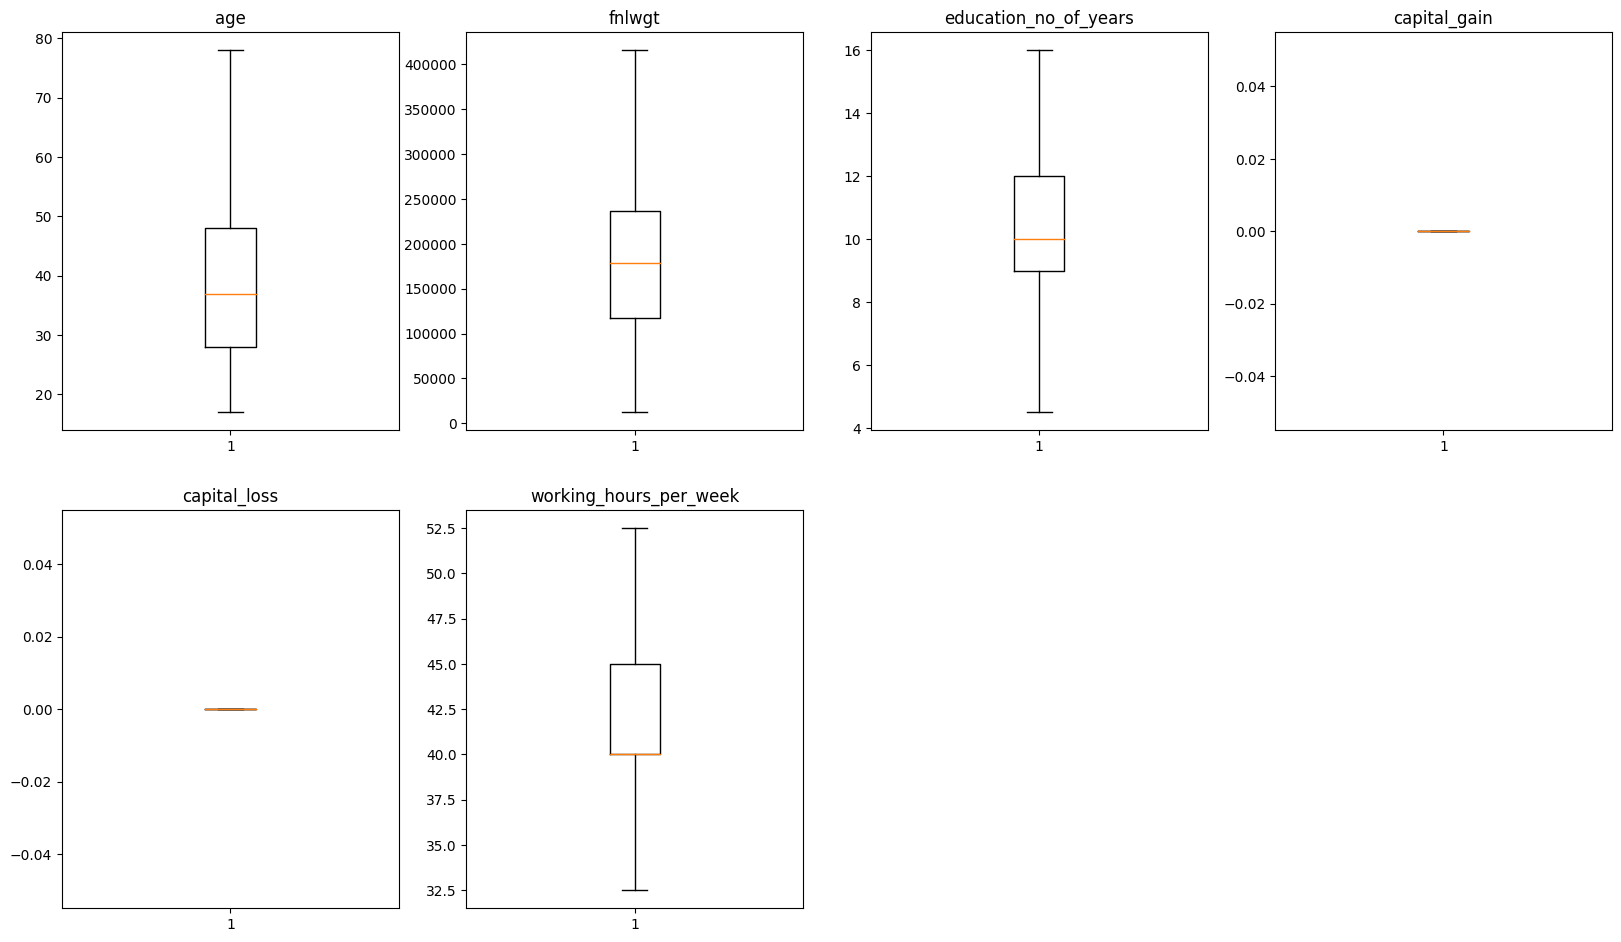

In [47]:
#sanity checks on the treated outliers using boxplot
plt.figure(figsize = (20,30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(DeltaSquare[variable], whis = 1.5)
    plt.title(variable)
plt.show()

In [48]:
#check for missing values using .describe
DeltaSquare.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,salary
count,32537.000000,32537.000000,32537.000000,32537.0,32537.0,32537.000000,32537.000000
mean,38.559855,186824.961736,10.125165,0.0,0.0,41.203246,0.240926
std,13.554847,95118.115529,2.459436,0.0,0.0,6.187352,0.427652
min,17.000000,12285.000000,4.500000,0.0,0.0,32.500000,0.000000
25%,28.000000,117827.000000,9.000000,0.0,0.0,40.000000,0.000000
50%,37.000000,178356.000000,10.000000,0.0,0.0,40.000000,0.000000
75%,48.000000,236993.000000,12.000000,0.0,0.0,45.000000,0.000000
max,78.000000,415742.000000,16.000000,0.0,0.0,52.500000,1.000000


This showed that the dataset is good to be used to build the logistic regression model.

### Build the logistic regression model

#### Feature Selection
Data will be split into 80% traing and 20% test

In [60]:
#import libry for spliting data

from sklearn.model_selection import train_test_split
#selecting my features
x = DeltaSquare.drop('salary' axis = 1)
y = DeltaSquare['salary']


In [72]:
# convert all categorical features to numerical data (OneHotEncoding)
x = pd.get_dummies(x, drop_first = True)

In [73]:
x.head()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13.0,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13.0,0,0,32.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9.0,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7.0,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13.0,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#split the data into 2 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y)

In [75]:
x_train.shape

(26029, 100)

In [76]:
x_test.shape

(6508, 100)

In [77]:
y_train.shape

(26029,)

In [78]:
y_test.shape

(6508,)

In [79]:
#checking to ensure that date is maintained after applying stratify
y_train.value_counts(normalize = True)

0    0.759076
1    0.240924
Name: salary, dtype: float64

This showed that the data was maintained after the spliting

In [80]:
y_test.value_counts(normalize = True)

0    0.759066
1    0.240934
Name: salary, dtype: float64

The proportion of the data was mainatined in both training and test.

In [81]:
#Normalize the data using MinMa scaler
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()
x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

In [94]:
# build and train the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)#, class_weight={1:0.9,0:0.1}) # apply regulation

log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0)

### Model Performance Check

In [91]:
from sklearn.metrics import (accuracy_score, recall_score,precision_score,f1_score)

In [102]:
from sklearn.metrics import confusion_matrix
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

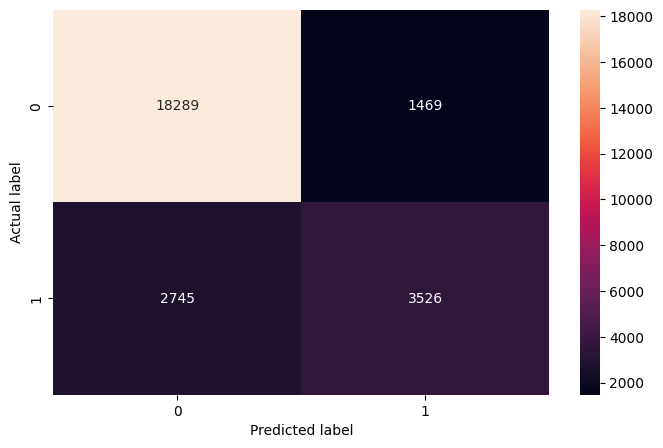

,Accuracy,Recall,Precision,F1-score
0,0.838104,0.562271,0.705906,0.625954


In [103]:
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)
log_reg_train 

- Given a new data that is similar to the one used to build this model, the model will be able to predict accurately 83.8% of the income of the people. Please note that the accuracy may not be truth because the data used is imbalance. We will still work on that as we progressess.
- Using Confusion matrix to explain further, The model made good prediction that 3526 people will likely get above 50k salary or income (True Positive) while 18289 people will get get income equal to or less than 50K.
- The model also wrongly predicted 1469 people will earn above 50k while they are likely to earn either 50k or less than 50k.
- There is also wrong prediction that 2745 people will not earn above 50k while they are likely going to earn above 50k

The model does not look good enough. I will need to balance the data and improve on it to rebuild the model.

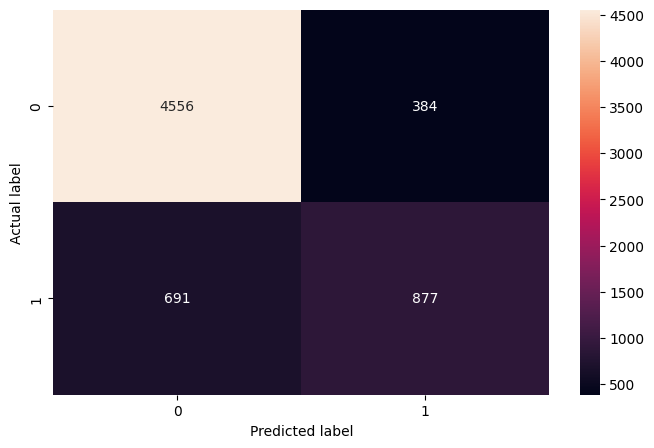

,Accuracy,Recall,Precision,F1-score
0,0.834819,0.559311,0.69548,0.620007


In [123]:
log_reg_test = model_performance_classification(log_reg, x_test_sd, y_test)
log_reg_test 

The performance here is poor because of imbalance data. We will need to do more to ensure that we get a good model for this prediction.

### Model Improvement
- Change the Metric
- Balance the data
- ROC_AUC
- Tree based models

#### Change the metrics

My concern here is to minimize the false positive where the model showed that 7764 people will earn above 50k. This project is about changing the lives of underprivileged sections of society. Wrongly assigning people to group that earns above 50k will lead to poor performance of the model.
Therefore, to focus on minimizing false positives and improving precision, I will pay closer attention to the precision metric when evaluating and comparing different classification models or tuning the model's threshold.

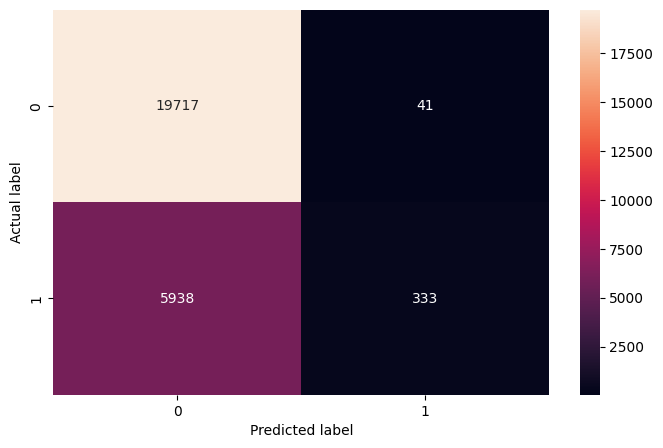

,Accuracy,Recall,Precision,F1-score
0,0.770295,0.053102,0.890374,0.100226


In [110]:
#tweek the threshold to 0.9 to gain high precision since I am interested in reducing false positive (FP)
log_reg_train1 = model_performance_classification(log_reg, x_train_sd, y_train, threshold = 0.9)
log_reg_train1 

The recall reduced drastically to 0.05&, while F1-score reduced to 0.10%. The accurracy stood at 77%. However, my precision which I am interested in moved upto 89%.
This however, is on training, we will also do all these things again when we decide on the model to use.

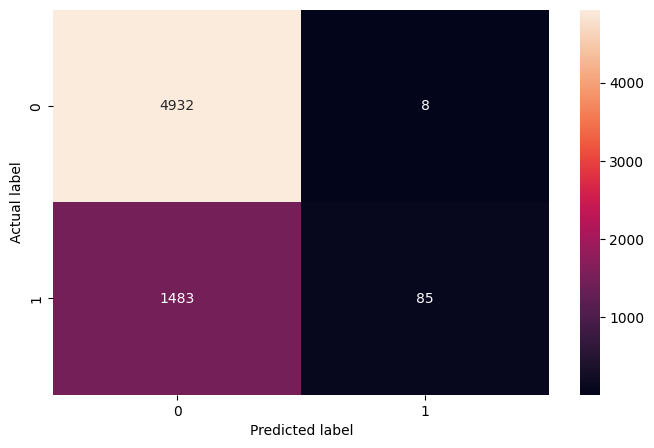

,Accuracy,Recall,Precision,F1-score
0,0.770897,0.054209,0.913978,0.102348


In [122]:
log_reg_test1 = model_performance_classification(log_reg, x_test_sd, y_test, threshold = 0.9)
log_reg_test1 

The precision improved , howver other metrics like recall and f1-score are still poor.

### Balancing the data

###### install library for balancing data

In [111]:
#pip install imblearn
from imblearn.over_sampling import RandomOverSampler, ADASYN,BorderlineSMOTE, SMOTE

In [113]:
smote = SMOTE(random_state=0)
x_sm, y_sm = smote.fit_resample(x,y)

In [114]:
y_sm.value_counts(normalize = True)

0    0.5
1    0.5
Name: salary, dtype: float64

In [115]:
#split the data into for SMOTE

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size = 0.2)

In [116]:
#normalize the data
scaler = MinMaxScaler()
x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_test_sm_sd = scaler.transform(x_test_sm)

In [129]:
log_reg2 = LogisticRegression(random_state = 0)
log_reg2.fit(x_train_sm_sd, y_train_sm)

LogisticRegression(random_state=0)

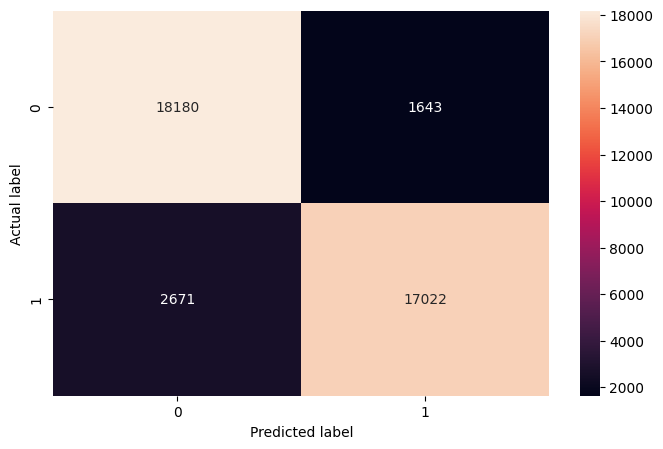

,Accuracy,Recall,Precision,F1-score
0,0.890829,0.864368,0.911974,0.887533


In [130]:
log_reg2_train = model_performance_classification(log_reg2, x_train_sm_sd, y_train_sm)
log_reg2_train 

- The scores for all the metrics showed good improvement with Precision been at approximately 91.2%.The model correctly predicted that 17022 people earns salary above 50k while 18180 people earns income that is equal or below 50k
- It wrongly predicted that 1643 earned above 50k (FP).
- There is also wrong prediction that 2671 people earns below 50k or below while they actually earns above 50k

Note that the threshold is not tweaked on this

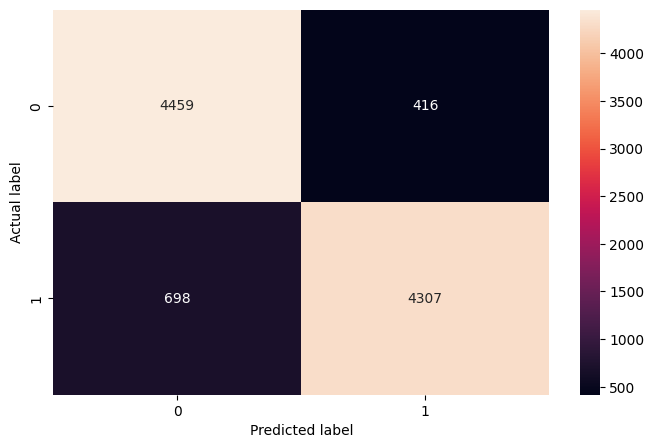

,Accuracy,Recall,Precision,F1-score
0,0.887247,0.860539,0.91192,0.885485


In [131]:
# checking the result on testing to ensure that overfit or underfit did not occur

log_reg2_test = model_performance_classification(log_reg2, x_test_sm_sd, y_test_sm)
log_reg2_test

The model generalized well and did not overfit.
Also to note is that all the metrics improved when I used SMOTE to balance the data.

#### tweeking the threshold since we are interested in the precision

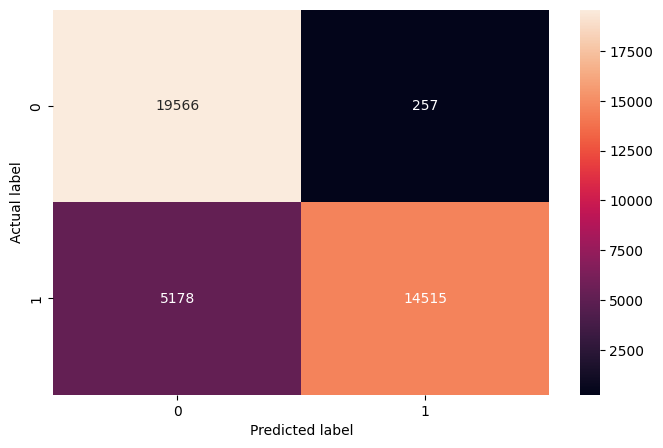

,Accuracy,Recall,Precision,F1-score
0,0.862461,0.737064,0.982602,0.842304


In [132]:
log_reg3_train = model_performance_classification(log_reg3, x_train_sm_sd, y_train_sm, threshold = 0.8)
log_reg3_train 

Tweeking the threshold made the model more better. The false positive which we are interested in was improved. The people that was prdeicted on training to earn above 50k when threshold was not applied was reduce from 1643 to 257 when the threshold was set to 0.8

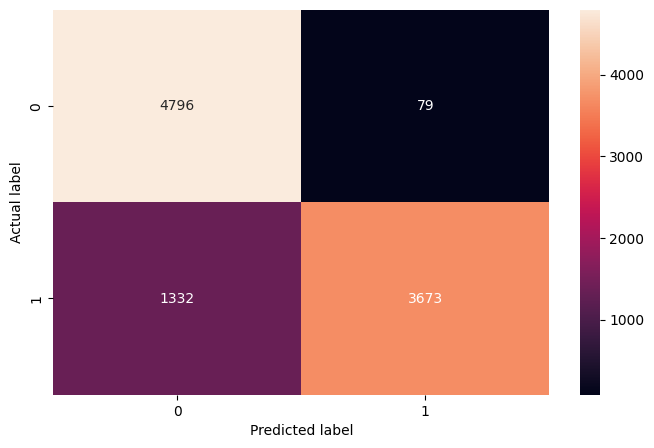

,Accuracy,Recall,Precision,F1-score
0,0.857186,0.733866,0.978945,0.838872


In [133]:
log_reg3_test = model_performance_classification(log_reg3, x_test_sm_sd, y_test_sm, threshold = 0.8)
log_reg3_test 

The model generalized well on test but this can also be improved on.

### Building model with Decision tree

In [124]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier


In [125]:
dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(x_train_sm,y_train_sm)


DecisionTreeClassifier(random_state=0)

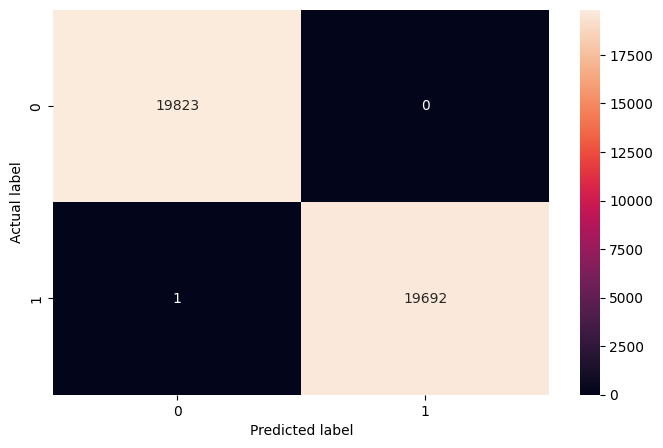

,Accuracy,Recall,Precision,F1-score
0,0.999975,0.999949,1.0,0.999975


In [127]:
dec_tree_train = model_performance_classification(dec_tree, x_train_sm, y_train_sm)
dec_tree_train 

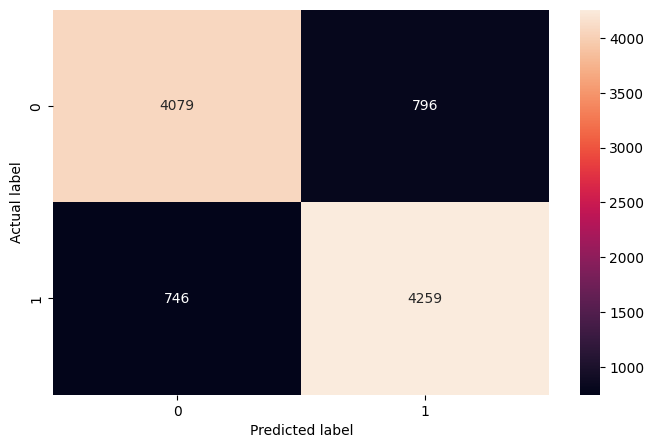

,Accuracy,Recall,Precision,F1-score
0,0.843927,0.850949,0.842532,0.84672


In [128]:
dec_tree_test = model_performance_classification(dec_tree, x_test_sm, y_test_sm)
dec_tree_test

The model slightly overfits as it did perfect on training but slightly poorer on the test.I will try to tweek the metrics to see if there will be improvement.

#### Perform hyperparameter tuning in the class weight to tacke the over fitting

In [136]:
#train and build the model
dec_tree1 = DecisionTreeClassifier(random_state=0, class_weight = {0:0.1, 1:0.9})
dec_tree1.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

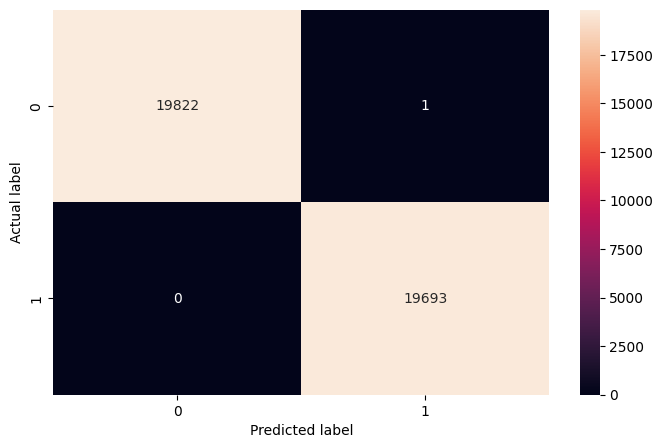

,Accuracy,Recall,Precision,F1-score
0,0.999975,1.0,0.999949,0.999975


In [137]:
#check the performance on training
dec_tree_train1 = model_performance_classification(dec_tree1, x_train_sm, y_train_sm)
dec_tree_train1 

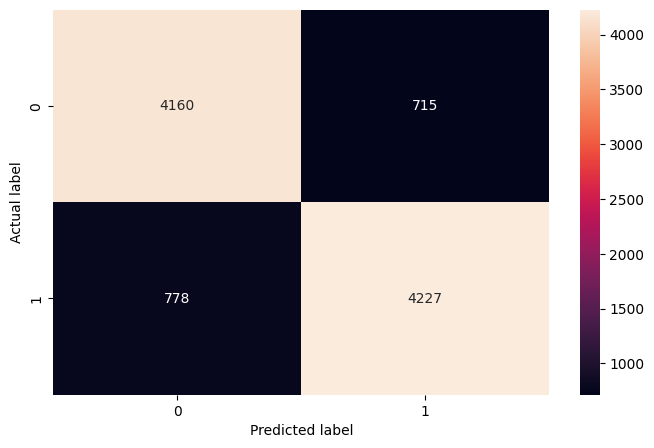

,Accuracy,Recall,Precision,F1-score
0,0.848887,0.844555,0.855322,0.849904


In [138]:
dec_tree_test1 = model_performance_classification(dec_tree1, x_test_sm, y_test_sm)
dec_tree_test1 

The Decison tree methods still overfits.

#### Applying pre-prunning strategy on the decision tree algorithm

In [139]:
#train and build the model
dec_tree2 = DecisionTreeClassifier(random_state=0, max_depth=4)
dec_tree2.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=0)

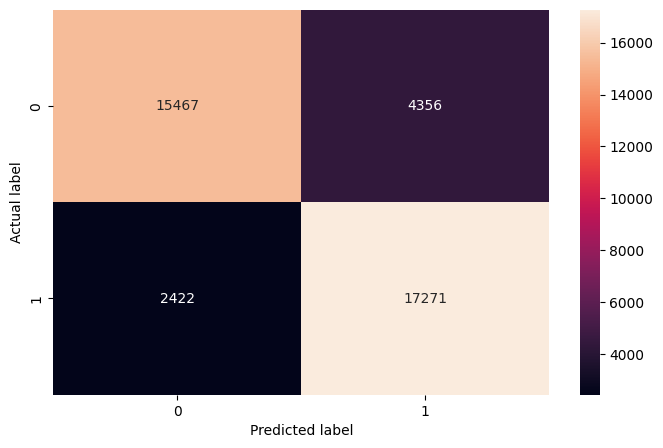

,Accuracy,Recall,Precision,F1-score
0,0.828475,0.877012,0.798585,0.835963


In [140]:
#check the performance on training
dec_tree_train2 = model_performance_classification(dec_tree2, x_train_sm, y_train_sm)
dec_tree_train2 

The precision which I am interested seems to perform poorly. However, I will need to check on test.

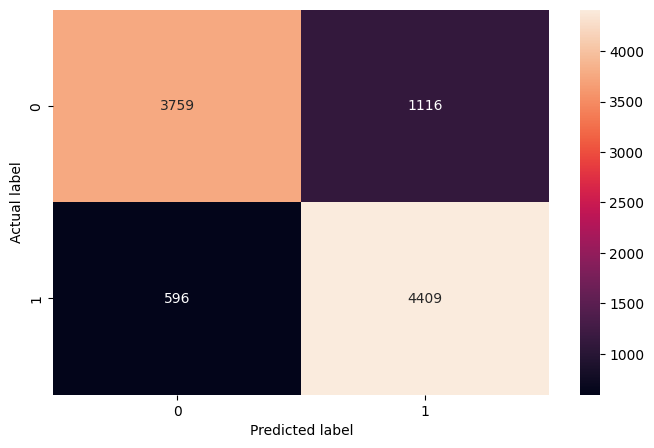

,Accuracy,Recall,Precision,F1-score
0,0.826721,0.880919,0.798009,0.837417


In [141]:
dec_tree_test2 = model_performance_classification(dec_tree2, x_test_sm, y_test_sm)
dec_tree_test2 

After applying the preprunning startegy by setting the max dept to 4. The performance improved very well.

### Actionable Insights - Recommendation

##### Prefered Predictive model for income and the insights about the models built

- Various Logistics and Decision tree  models were build to get the best model that will predict the income or salary of the people in the dataset which will help to change  lives of underprivileged sections of society
- Both Logistics and Decision tree methods did not do well without data improvements and parameter and metric tunings.
- The Logistic model where the threshold was set to 0.8 did well as the precision on training is 0.982602 while that of test is 0.978945. Other metrics like accuracy, recall and f1-score also did well in both training and test.
- The Decision tree model where we the max depth was set to 4 also generalized very well. However the performance of the Logistic model where the threshold was set to 0.8 did better and will serve the purpose better.
- I will therefore recoomend chosing the Logistics model where the threshold was set to 0.8

### Data Insights, Recommendations and Takeaways

##### Data Insights

- The visualization of the data was not able to show any good releationship between various independent variables and the dependent variable salary.
- It is observed that 69.7% of the people work in the private sector. The Local, State and the Federal government contributes only 13.4% of jobs for the people in this dataset.
- Most of the population are high school graduate which constitutes 32.3%  of the education population. This is distantly followed by those with bachelors at 16.5%. 
- There are more civilian married couple and litle or no armed force married couple
- Most of the people here are native Americans
- Majority of the population are WHITES
- 75.9% of the population in the dtatset earns less than or equal to 50k while 24.1% earns above 50k
- Occupation are evenly distributed among the occupation type provided. The occupation did not show any relationship to the income.


##### Recommendations and Takeaways

- Since we are looking at changing the lives of underprivileged sections of society, we need to improve the educatio awareness  education to get more people to get to Bachelors level. This will help to create more skills and impacts on the underpriviledged.
- There is need need to look at the education sector to understand how where improvement is needed to ensure that more people are moved to Bachelors level
- The Logistic model built should be used to predict people that will earn lower than 50k. The predicted people should be engaged to obtain more data that will help in to make produce the policy framework that will help to change the lives of the underpriviledged.
- There is need to obtain data like minimum wage, access and hindrances to basic social amenities. These informations will help us to make decision that will change  the lives of underprivileged sections of society.
